In [ ]:
%pip install -r ../requirements.txt

In [2]:
from schema import WLD

wld = WLD(file_path="../data/example-chappy.wld")

In [3]:
# Create a dictionary to count exercise instances
press_counts = {}

# Iterate through all workouts and exercises
for workout in wld.workouts:
    for exercise in workout.exercises:
        if "Press" in exercise.name and exercise.category != "Legs":
            press_counts[exercise.name] = press_counts.get(exercise.name, 0) + 1

# Sort by count in descending order
sorted_presses = sorted(press_counts.items(), key=lambda x: x[1], reverse=True)

# Print results
print("Press exercises by frequency (excluding legs):")
for name, count in sorted_presses:
    print(f"{name}: {count} instances")


Press exercises by frequency (excluding legs):
Barbell Bench Press: 679 instances
Overhead Press: 403 instances
Close-grip Bench Press: 269 instances
Arnold Press: 112 instances
Dumbbell Bench Press: 41 instances
Landmine Press: 37 instances
Pin Press: 34 instances
Machine Press: 33 instances
One-arm Landmine Press: 23 instances
DB Press/Flyes: 11 instances
Military Press: 6 instances
Cable Press: 3 instances
Smith Machine Bench Press: 2 instances
Timed Pin Press: 1 instances
Timed Bench Press: 1 instances
Close-grip Dumbbell Press: 1 instances


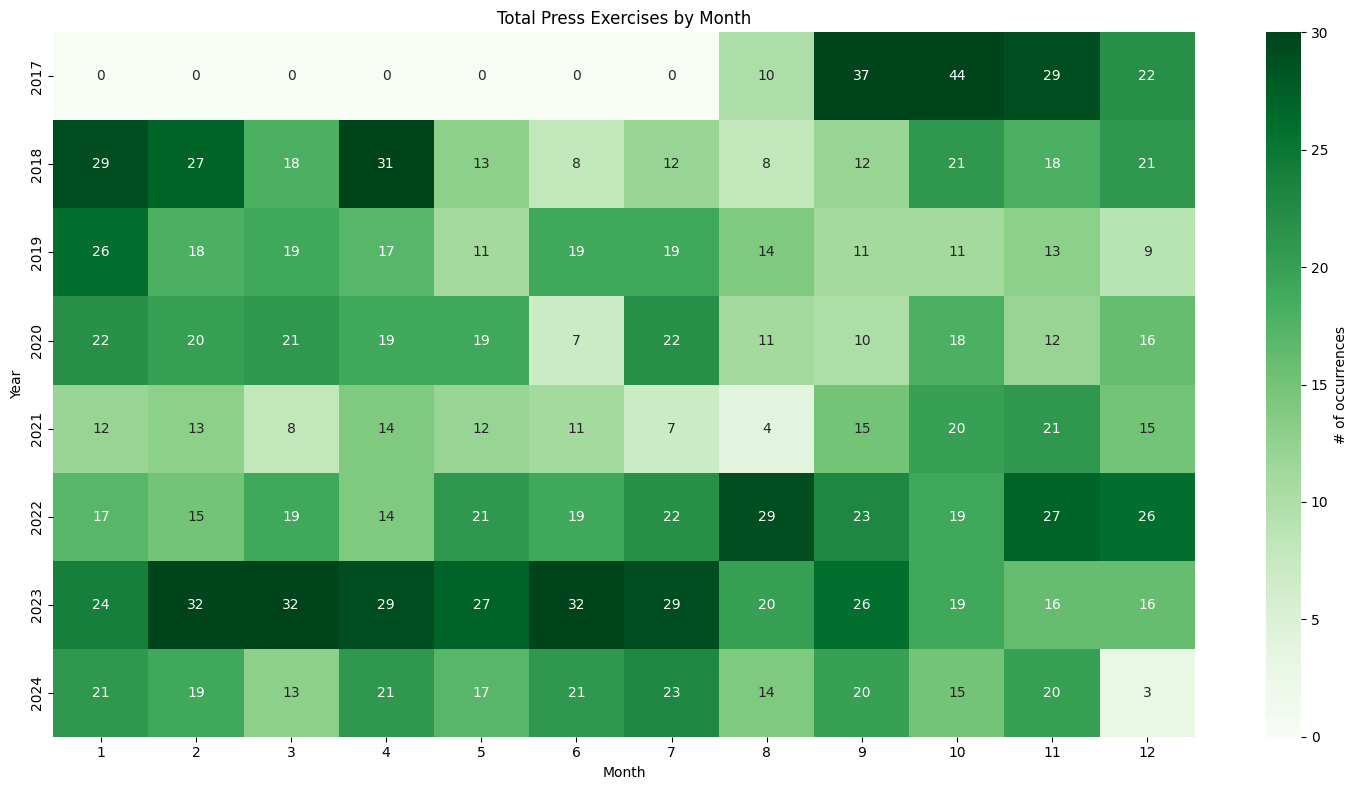

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Create list of (date) tuples
press_dates = []
for workout in wld.workouts:
    for exercise in workout.exercises:
        if "Press" in exercise.name and exercise.category != "Legs":
            press_dates.append(workout.date)

# Convert to DataFrame
df = pd.DataFrame(press_dates, columns=['date'])

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Create pivot table for heatmap
pivot = pd.pivot_table(
    df,
    values='date',
    index='year',
    columns='month',
    aggfunc='count',
    fill_value=0
)

# Create figure
plt.figure(figsize=(15, 8))

# Create heatmap with capped color scale
sns.heatmap(
    pivot,
    cmap='Greens',
    annot=True,
    fmt='g',
    vmax=30,
    cbar_kws={'label': '# of occurrences'}
)

plt.title('Total Press Exercises by Month')
plt.xlabel('Month')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


In [5]:
# Sort dates chronologically
sorted_dates = sorted(press_dates)

# Calculate gaps between consecutive dates
gaps = []
for i in range(len(sorted_dates)-1):
    gap = sorted_dates[i+1] - sorted_dates[i]
    gaps.append((gap.days, sorted_dates[i], sorted_dates[i+1]))

# Sort gaps by duration (descending) and get top 10
top_gaps = sorted(gaps, key=lambda x: x[0], reverse=True)[:10]

# Print results
print("Top 10 longest gaps between press exercises:")
print("\nDays  Start Date          End Date")
print("-" * 40)
for gap in top_gaps:
    print(f"{gap[0]:4d}  {gap[1].strftime('%Y-%m-%d')}  {gap[2].strftime('%Y-%m-%d')}")


Top 10 longest gaps between press exercises:

Days  Start Date          End Date
----------------------------------------
  29  2021-08-09  2021-09-07
  17  2021-03-14  2021-04-01
  15  2021-07-03  2021-07-18
  14  2020-06-12  2020-06-26
  13  2024-12-07  2024-12-21
  12  2019-07-24  2019-08-05
  11  2017-12-23  2018-01-03
  10  2019-09-08  2019-09-19
  10  2020-08-29  2020-09-08
   9  2018-05-28  2018-06-07


In [6]:
first_press = min(press_dates)
last_press = max(press_dates)
career_span = last_press - first_press

print(f"First press: {first_press.strftime('%Y-%m-%d')}")
print(f"Last press:  {last_press.strftime('%Y-%m-%d')}")
print(f"Total time:  {career_span.days} days ({career_span.days/365.25:.1f} years)")


First press: 2017-08-15
Last press:  2024-12-21
Total time:  2684 days (7.3 years)
